In [1]:
import pandas as pd
df = pd.read_csv('c:/data/ram/ram_price.csv')
df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


Text(0, 0.5, 'price')

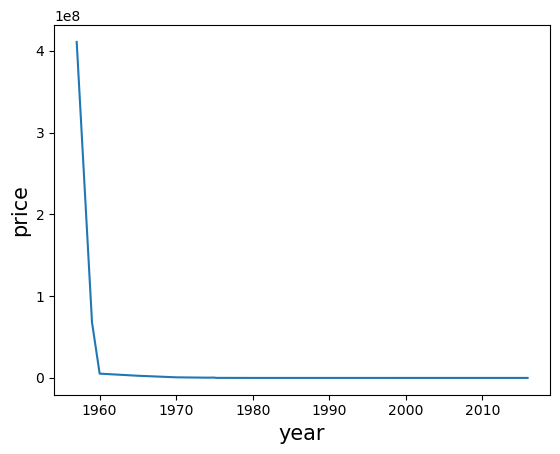

In [2]:
import matplotlib.pyplot as plt 
plt.plot(df['date'],df['price'])
plt.xlabel('year',size=15)
plt.ylabel('price', size=15)

Text(0, 0.5, 'price ($/Mbyte)')

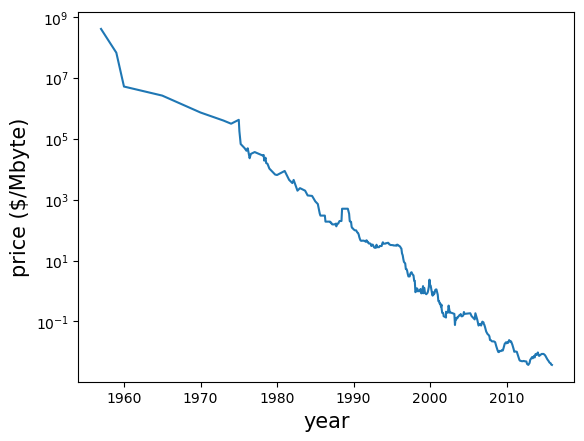

In [3]:
#y축 로그 스케일
plt.semilogy(df['date'], df['price'])
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)
# x축: 날짜, y축: 램 가격

In [4]:
#학습용과 검증용 구분(2000년 이전과 이후로 구분)
import numpy as np
X_train0 = df[df['date'] < 2000]
X_test = df[df['date'] >= 2000]

# 기계학습모형에는 2차원 형태의 데이터가 입력되어야 함.
X_train = X_train0['date'][:, None] # date필드만 선택 => 2차원 변환

#y값 로그 스케일 변환
y_train = np.log(X_train0['price'])
y_test=np.log(X_test['price'])

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13624\1670888406.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train0['date'][:, None] # date필드만 선택 => 2차원 변환


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
tree = DecisionTreeRegressor().fit(X_train, y_train) # 결정트리모형
lr = LinearRegression().fit(X_train, y_train) # 선형회귀모형
# svr = SVR(kernel='linear').fit(X_train, y_train) # 선형회귀모형
svr = SVR(kernel='rbf').fit(X_train, y_train) # 비선형회귀모형

# 전체 기간의 자료
x_all = np.array(df['date']).reshape(-1, 1)

pred_tree = tree.predict(x_all)
price_tree = np.exp(pred_tree) # log값 되돌리기

pred_lr = lr.predict(x_all)
price_lr = np.exp(pred_lr) # log값 되돌리기

pred_svr = svr.predict(x_all)
price_svr = np.exp(pred_svr) # log값 되돌리기


In [9]:
#RMS 비교
from sklearn.metrics import mean_squared_error
y_pred = tree.predict(X_test['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

y_pred = lr.predict(X_test['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

y_pred = svr.predict(X_test['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

23.038370257895192
861.08402279523
10.42933757466685


Text(0, 0.5, 'price')

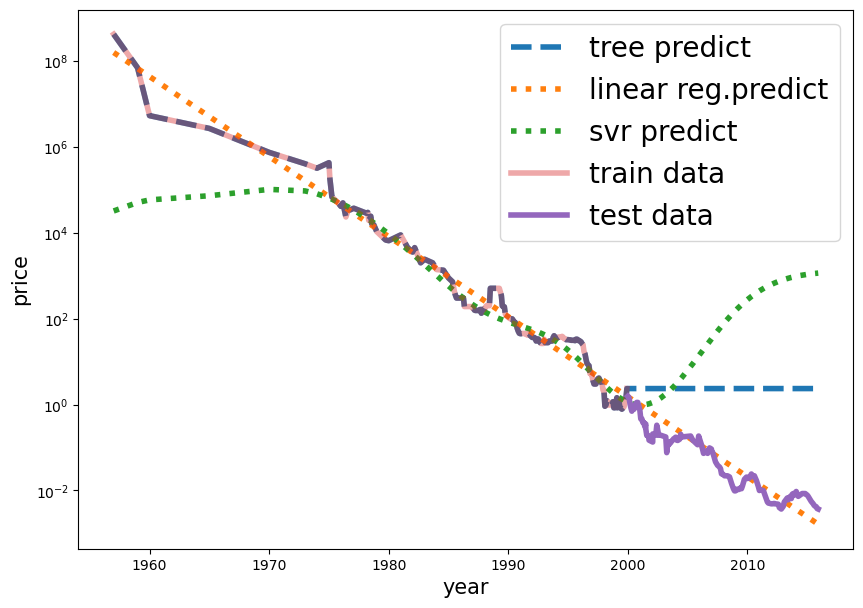

In [10]:
#실제값과 결정트리모형의 예측값, 선형회귀모형의 예측값 비교
plt.figure(figsize=(10,7))
plt.semilogy(df['date'], price_tree, label='tree predict', lw='4', ls='--')
plt.semilogy(df['date'], price_lr, label='linear reg.predict', lw='4', ls=':')
plt.semilogy(df['date'],price_svr,label='svr predict',lw='4',ls=':')

plt.semilogy(X_train0['date'], X_train0['price'], label='train data', 
             lw='4', alpha=0.4)
plt.semilogy(X_test['date'], X_test['price'], label='test data', lw='4')
plt.legend(loc=1, fontsize=20)
plt.xlabel('year', size=15)
plt.ylabel('price', size=15)
# 회귀트리모형은 학습용 데이터의 범위를 벗어나는 새로운 데이터의 예측력이 떨어짐.
# 새로운 데이터를 예측하기 위해서는 시계열분석, 순환신경망(RNN) 등을 사용하여 분석.